In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
from wordcloud import WordCloud, STOPWORDS
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings

warnings.filterwarnings("ignore")

def plot_wordcloud(text, title=None, max = 1000, size=(10,5), title_size=16):
    """plots wordcloud"""
    wordcloud = WordCloud(max_words=max).generate(text)
    plt.figure(figsize=size)
    plt.title(title, size=title_size)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

def clean_ColText(df, col, stem=True):
    """Takes dataframe and column name and returns a dataframe with cleaned strings in the form of a list. Stemming is an option."""
    table = str.maketrans('', '', string.punctuation)
    df[col] = df[col].map(lambda x: x.translate(table)) #remove punctuation
    df[col] = df[col].map(lambda x: x.lower()) #lowercase
    df[col] = df[col].apply(word_tokenize) #tokenize
    stop_words = set(stopwords.words('english'))
    df[col] = df[col].map(lambda x: [y for y in x if not y in stop_words]) #remove stop words
    df[col] = df[col].map(lambda x: [y for y in x if y not in ["’","’","”","“","‘","—"]]) #remove smart quotes and other non alphanums
    if stem:
        porter = PorterStemmer()
        df[col] = df[col].map(lambda x: [porter.stem(y) for y in x])
        return df
    return df


['CommentsApril2017.csv', 'ArticlesFeb2018.csv', 'CommentsJan2017.csv', 'CommentsFeb2018.csv', 'CommentsFeb2017.csv', 'ArticlesMarch2017.csv', 'CommentsMarch2018.csv', 'ArticlesMay2017.csv', 'ArticlesJan2018.csv', 'ArticlesJan2017.csv', 'CommentsJan2018.csv', 'CommentsMarch2017.csv', 'ArticlesApril2018.csv', 'CommentsMay2017.csv', 'ArticlesMarch2018.csv', 'CommentsApril2018.csv', 'ArticlesFeb2017.csv', 'ArticlesApril2017.csv']


/opt/conda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
#construct 2017 and 2018 df
frames_17 = []
frames_18 = []
for f in os.listdir("../input"):
    if ('Articles' in f) and ('2018' in f):
        temp_df = pd.read_csv("../input/{}".format(f))
        frames_18.append(temp_df)
    if ('Articles' in f) and ('2017' in f):
        temp_df = pd.read_csv("../input/{}".format(f))
        frames_17.append(temp_df)
df_17 = pd.concat(frames_17)
df_18 = pd.concat(frames_18)
df_18.head()

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,NaN,5a7258e410f40f00018bed7d,835,By NICHOLAS KRISTOF,article,I Stand With the ‘She-Devils’,"['Women and Girls', ""Women's Rights"", 'United ...",68,OpEd,23,2018-02-01 00:01:36,Unknown,"Progress on women’s rights was stalling, and t...",The New York Times,Op-Ed,https://www.nytimes.com/2018/01/31/opinion/cou...
1,NaN,5a725f2410f40f00018bed89,864,By GAIL COLLINS,article,Trump’s Birth Control Problems,"['Trump, Donald J', 'Clifford, Stephanie (1979...",68,OpEd,23,2018-02-01 00:28:16,Unknown,Plus: the night the porn star yawned.,The New York Times,Op-Ed,https://www.nytimes.com/2018/01/31/opinion/tru...
2,NaN,5a725f4210f40f00018bed8a,203,By LARA TAKENAGA,article,What’s the Craziest Thing You’ve Ever Found in...,"['New York Times', 'Xerox Corporation', 'Fujif...",68,NewsDesk,0,2018-02-01 00:28:46,Unknown,The bulky copiers could soon become an office ...,The New York Times,News,https://www.nytimes.com/2018/01/31/reader-cent...
3,NaN,5a72646310f40f00018bed97,899,By THE EDITORIAL BOARD,article,U.S. Allies’ Conflict Is ISIS’ Gain,"['United States International Relations', 'Kur...",65,Editorial,22,2018-02-01 00:50:37,Unknown,"Turkey’s attacks on Syrian Kurds, America’s st...",The New York Times,Editorial,https://www.nytimes.com/2018/01/31/opinion/edi...
4,NaN,5a72686b10f40f00018bed9e,1116,By JIM TANKERSLEY and JULIE HIRSCHFELD DAVIS,article,"$1.5 Trillion Plan on Infrastructure, but Not ...","['Infrastructure (Public Works)', 'Trump, Dona...",68,Washington,14,2018-02-01 01:07:50,Politics,The proposal received a cool reception from De...,The New York Times,News,https://www.nytimes.com/2018/01/31/us/politics...


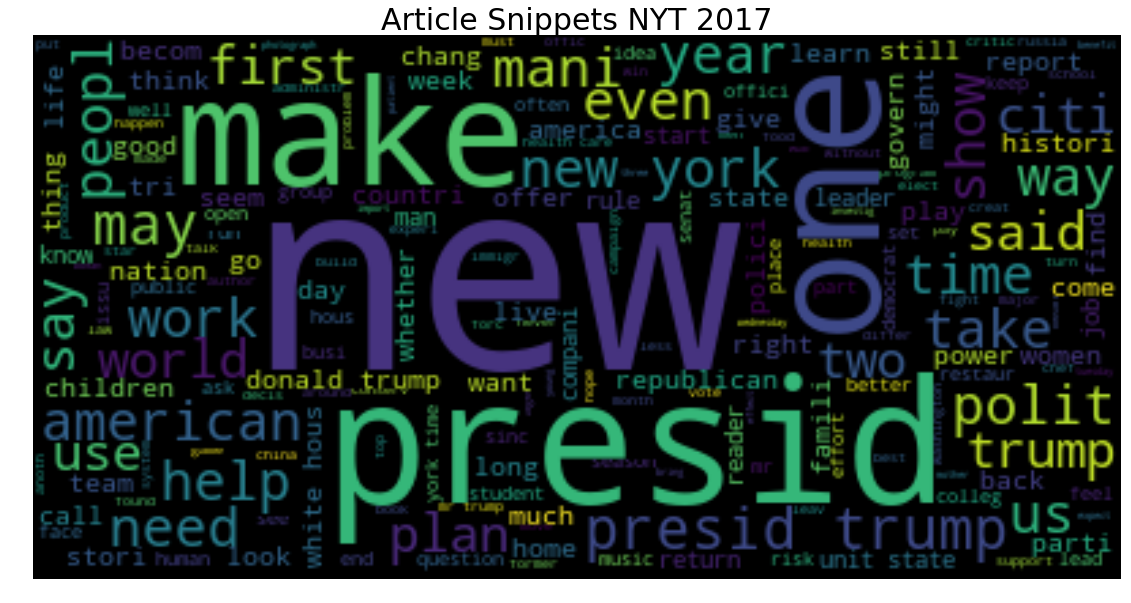

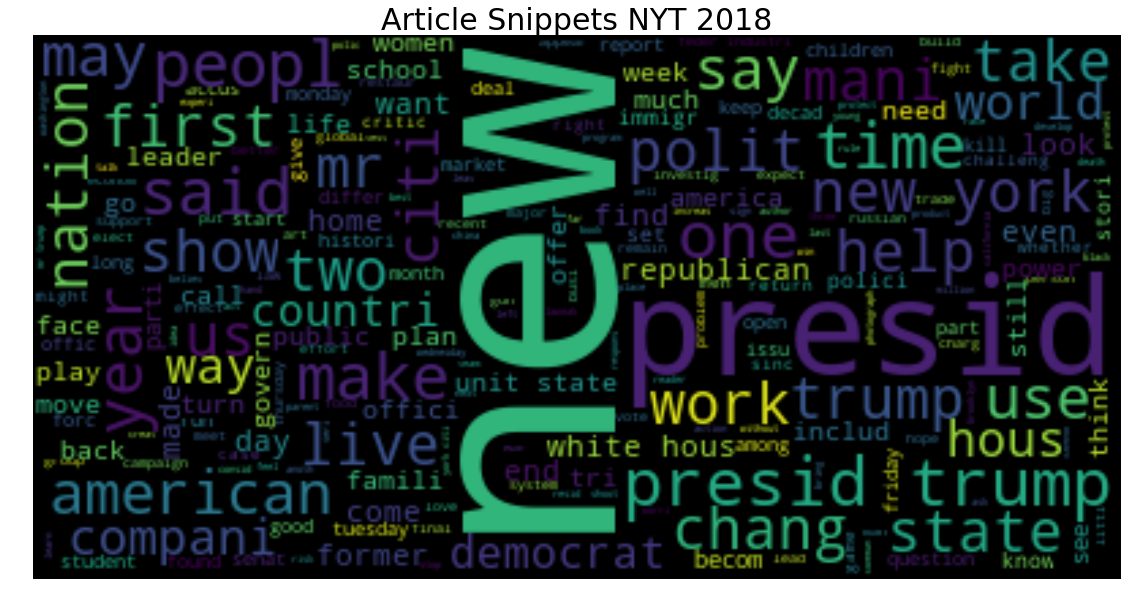

In [3]:
#Cleaning Text in the snippet column
col = 'snippet'
df_17 = clean_ColText(df_17, 'snippet')
df_18 = clean_ColText(df_18, 'snippet')

#joining all the lists from the snippet column and generating a corpus from each year
snip_17 = ' '.join(sum([x for x in df_17['snippet']],[]))
snip_18 = ' '.join(sum([x for x in df_18['snippet']],[]))

#output wordclouds
plot_wordcloud(snip_17, title='Article Snippets NYT 2017', size=(20,10), title_size=30)
plot_wordcloud(snip_18, title='Article Snippets NYT 2018', size=(20,10), title_size=30)

Looks like there's no change in the most prominent topic between 2017 and 2018 which is politics.

# Sentiment Analysis of comments for each article

In [4]:
#construct 2017 and 2018 df
frames_17 = []
frames_18 = []
for f in os.listdir("../input"):
    if ('Comments' in f) and ('2018' in f):
        temp_df = pd.read_csv("../input/{}".format(f))
        frames_18.append(temp_df)
    if ('Comments' in f) and ('2017' in f):
        temp_df = pd.read_csv("../input/{}".format(f))
        frames_17.append(temp_df)
df_17_comm = pd.concat(frames_17)
df_18_comm = pd.concat(frames_18)
df_18_comm.head()

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
0,1517529462,5a7258e410f40f00018bed7d,835.0,The snake-filled heads comment made me think o...,25791250.0,25791250.0,<br/>,comment,1517508359,1.0,...,approved,1,0,Op-Ed,1517529462,Jennie,79172841.0,WA,NaN,NaN
1,1517529428,5a7258e410f40f00018bed7d,835.0,She-devil reporting for duty!,25795675.0,25795675.0,<br/>,comment,1517527262,1.0,...,approved,1,0,Op-Ed,1517529428,Nice White Lady,66376882.0,Seattle,NaN,NaN
2,1517529427,5a7258e410f40f00018bed7d,835.0,XX is the new mark of the devil.,25792078.0,25792078.0,<br/>,comment,1517511368,1.0,...,approved,1,0,Op-Ed,1517529427,Stan Sutton,27924638.0,"Westchester County, NY",NaN,NaN
3,1517529425,5a7258e410f40f00018bed7d,835.0,"""Courtland Sykes"" should be writing for The On...",25791604.0,25791604.0,<br/>,comment,1517509557,1.0,...,approved,1,0,Op-Ed,1517529425,Phil Carson,31909107.0,Denver,NaN,NaN
4,1517529418,5a7258e410f40f00018bed7d,835.0,"I happen to descend for a few of them, because...",25795241.0,25795241.0,<br/>,comment,1517524825,1.0,...,approved,1,0,Op-Ed,1517529418,Abby,55271958.0,Tucson,NaN,NaN


In [9]:
sid = SentimentIntensityAnalyzer()

df_17_comm['sent'] = df_17_comm['commentBody'].map(lambda x: sid.polarity_scores(x)['compound'])
#df_18_comm['sent'] = df_18_comm['commentBody'].map(lambda x: sid.polarity_scores(x)['compound'])

df_17_full = pd.merge(df_17_comm[['articleID', 'sent']], df_17, on='articleID', how='inner')
#df_18_full = pd.merge(df_18_comm[['articleID', 'sent']], df_18, on='articleID', how='inner')

df_17_full.head()

,articleID,sent,abstract,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,58def1347c459f24986d7c80,0.8481,NaN,716,By STEPHEN HILTNER and SUSAN LEHMAN,article,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",3,Insider,2,2017-04-01 00:15:41,Unknown,"[one, largest, photo, display, time, histori, ...",The New York Times,News,https://www.nytimes.com/2017/03/31/insider/nig...
1,58def1347c459f24986d7c80,-0.7165,NaN,716,By STEPHEN HILTNER and SUSAN LEHMAN,article,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",3,Insider,2,2017-04-01 00:15:41,Unknown,"[one, largest, photo, display, time, histori, ...",The New York Times,News,https://www.nytimes.com/2017/03/31/insider/nig...
2,58def1347c459f24986d7c80,0.1974,NaN,716,By STEPHEN HILTNER and SUSAN LEHMAN,article,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",3,Insider,2,2017-04-01 00:15:41,Unknown,"[one, largest, photo, display, time, histori, ...",The New York Times,News,https://www.nytimes.com/2017/03/31/insider/nig...
3,58def1347c459f24986d7c80,0.0656,NaN,716,By STEPHEN HILTNER and SUSAN LEHMAN,article,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",3,Insider,2,2017-04-01 00:15:41,Unknown,"[one, largest, photo, display, time, histori, ...",The New York Times,News,https://www.nytimes.com/2017/03/31/insider/nig...
4,58def1347c459f24986d7c80,0.3818,NaN,716,By STEPHEN HILTNER and SUSAN LEHMAN,article,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",3,Insider,2,2017-04-01 00:15:41,Unknown,"[one, largest, photo, display, time, histori, ...",The New York Times,News,https://www.nytimes.com/2017/03/31/insider/nig...


In [15]:
df_17_full.head()

,articleID,sent,abstract,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,58def1347c459f24986d7c80,0.8481,NaN,716,By STEPHEN HILTNER and SUSAN LEHMAN,article,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",3,Insider,2,2017-04-01 00:15:41,Unknown,"[one, largest, photo, display, time, histori, ...",The New York Times,News,https://www.nytimes.com/2017/03/31/insider/nig...
1,58def1347c459f24986d7c80,-0.7165,NaN,716,By STEPHEN HILTNER and SUSAN LEHMAN,article,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",3,Insider,2,2017-04-01 00:15:41,Unknown,"[one, largest, photo, display, time, histori, ...",The New York Times,News,https://www.nytimes.com/2017/03/31/insider/nig...
2,58def1347c459f24986d7c80,0.1974,NaN,716,By STEPHEN HILTNER and SUSAN LEHMAN,article,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",3,Insider,2,2017-04-01 00:15:41,Unknown,"[one, largest, photo, display, time, histori, ...",The New York Times,News,https://www.nytimes.com/2017/03/31/insider/nig...
3,58def1347c459f24986d7c80,0.0656,NaN,716,By STEPHEN HILTNER and SUSAN LEHMAN,article,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",3,Insider,2,2017-04-01 00:15:41,Unknown,"[one, largest, photo, display, time, histori, ...",The New York Times,News,https://www.nytimes.com/2017/03/31/insider/nig...
4,58def1347c459f24986d7c80,0.3818,NaN,716,By STEPHEN HILTNER and SUSAN LEHMAN,article,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",3,Insider,2,2017-04-01 00:15:41,Unknown,"[one, largest, photo, display, time, histori, ...",The New York Times,News,https://www.nytimes.com/2017/03/31/insider/nig...


In [16]:
import seaborn as sns

mean_sent_17 = df_17_full[['articleID','sent']].groupby('articleID').mean()
mean_sent_18 = df_18_full[['articleID','sent']].groupby('articleID').mean()
mean_sent_17['year'] = 2017
mean_sent_17['articleID'] = mean_sent_17.index
mean_sent_18['year'] = 2018
mean_sent_18['articleID'] = mean_sent_18.index

In [17]:
i_keep = set(mean_sent_17.index).intersection(set(mean_sent_18.index))
mean_sent_full = pd.concat([mean_sent_17, mean_sent_18])
mean_sent_full = mean_sent_full.loc[i_keep]

In [18]:
mean_sent_full.head()

,sent,year,articleID
articleID,,,
5ada363c068401528a2a9dc8,0.025037,2017,5ada363c068401528a2a9dc8
5ada363c068401528a2a9dc8,-0.002826,2018,5ada363c068401528a2a9dc8
5adb8330068401528a2a9f6e,0.784500,2017,5adb8330068401528a2a9f6e
5adb8330068401528a2a9f6e,0.003053,2018,5adb8330068401528a2a9f6e
5adb832c068401528a2a9f6b,0.210125,2017,5adb832c068401528a2a9f6b


In [26]:
#df.to_csv(r'D:\Sem-2\701-BD\project\Visualization\File Name.csv', index = False)
mean_sent_full.to_csv('sentiment.csv',index=False)

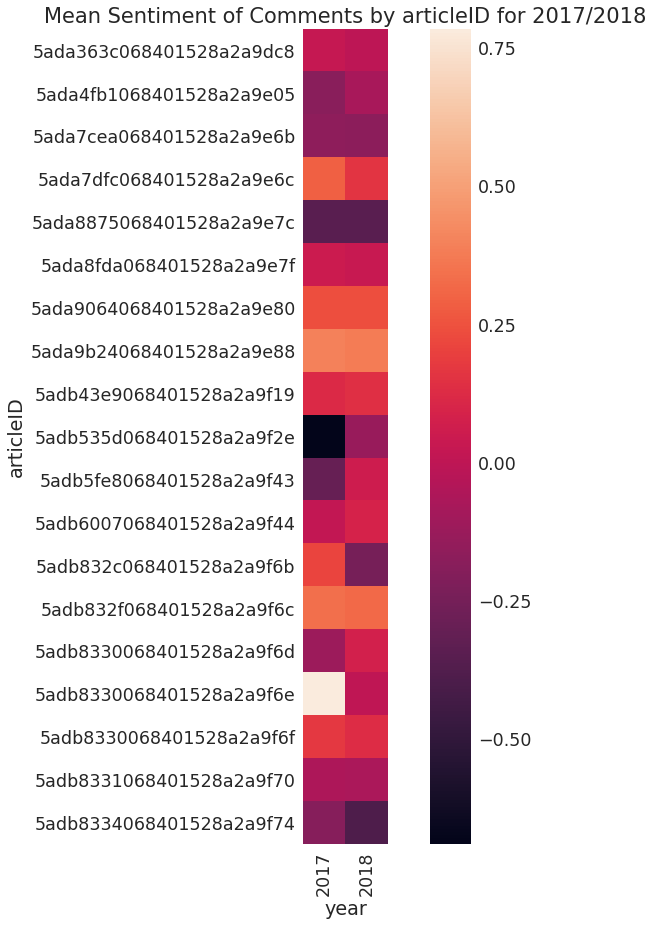